# Discussion 4: Visualizing Bigfoot

Many of you have probably heard of Bigfoot before. It's a mysterious ape-like creature that is said to live in North American forests. Most doubt it's existence, but a passionate few swear that bigfoot is real. In this discussion, you will be working with a dataset on bigfoot sightings, visualizing variable distributions and combinations thereof to better understand how/when/where bigfoot is reportedly spotted, and possibly either confirm or cast doubt on its existence. The bigfoot data contains a ton of variables about each reported bigfoot spotting, including location information, weather, and moon phase.

In [9]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Loading bigfoot data

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-13/bigfoot.csv'
df = pd.read_csv(url)

This dataset is extremely messy, with observations missing many values across multiple columns. This is normally the case with data based on citizen reports (many do not fill out all required fields). For the purposes of this discussion, we will drop all observations with any missing values and some unneeded columns. However, note this is not a good practice and you should almost never do this in real life!

In [11]:
# Drop unneeded rows and observations with missing values

bigfoot = df.dropna().rename({'temperature_high':'temp_high' ,'temperature_low':'temp_low'},axis = 1)
bigfoot = bigfoot.drop(['observed', 'location_details', 'county', 'state', 'title',
       'latitude', 'longitude', 'number', 'classification', 'geohash',
       'temperature_mid', 'dew_point','precip_probability', 'precip_type','summary', 
       'wind_bearing'], axis = 1)

Here are the first few entries of the `bigfoot` table:

In [12]:
bigfoot.head(5)

,season,date,temp_high,temp_low,humidity,cloud_cover,moon_phase,precip_intensity,pressure,uv_index,visibility,wind_speed
10,Summer,2016-06-07,74.69,53.80,0.79,0.61,0.10,0.0010,998.87,6.0,9.70,0.49
21,Summer,2015-10-02,49.06,44.24,0.87,0.93,0.67,0.0092,1022.92,3.0,9.16,2.87
32,Fall,2009-10-31,69.01,34.42,0.77,0.81,0.42,0.0158,1011.48,3.0,1.97,3.94
34,Summer,1978-07-15,68.56,63.05,0.88,0.80,0.33,0.0285,1014.70,5.0,5.71,5.47
55,Summer,2015-11-26,20.49,5.35,0.65,0.08,0.54,0.0002,1037.98,1.0,10.00,0.40


### Task 1

Let's first look at distributions of individual quantitative variables. Let's say we're interested in `wind_speed`. 

a) Which of the following are appropriate visualizations for plotting the distribution of a quantitative continuous variable? (Select all that applies)

A. Pie charts

B. Kernel Density Plot

C. Scatter plot

D. Boxplot

E. Histogram

F. Hexplots

*Solution: a **histogram**, **KDE**, or **boxplot** are probably the best choices for this question. You should be careful though with KDE: all of these variables are bounded in some way and KDE will show positive density for values that are impossible to observe (like negative wind speed)*

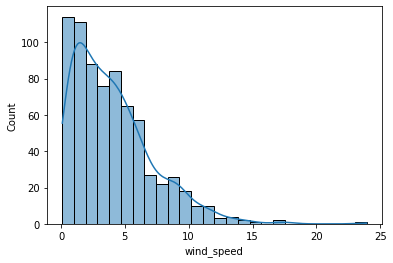

In [13]:
sns.histplot(data = bigfoot, x = 'wind_speed', kde = True);

(array([275., 213., 128.,  67.,  25.,   8.,   2.,   2.,   0.,   1.]),
 array([ 0.1  ,  2.484,  4.868,  7.252,  9.636, 12.02 , 14.404, 16.788,
        19.172, 21.556, 23.94 ]),
 <BarContainer object of 10 artists>)

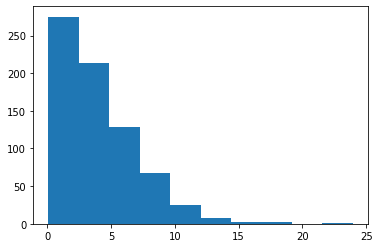

In [14]:
plt.hist(x=bigfoot["wind_speed"])

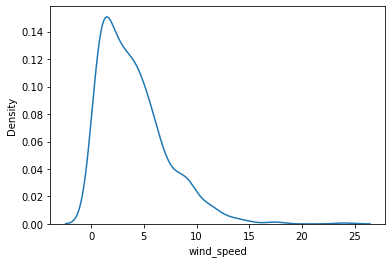

In [15]:
sns.kdeplot(data = bigfoot, x = 'wind_speed');

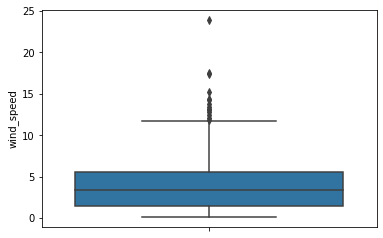

In [16]:
sns.boxplot(data = bigfoot, y = 'wind_speed' );

b) Write a line of code that produces the visualization that depicts the variable's distribution (example shown below). **Hint**: Use `seaborn(sns.histplot)/matplotlib(plt.hist)`.

![](https://drive.google.com/uc?export=view&id=1wlIyJjkdzxOoppv5400m3OyXwWdif3yO)

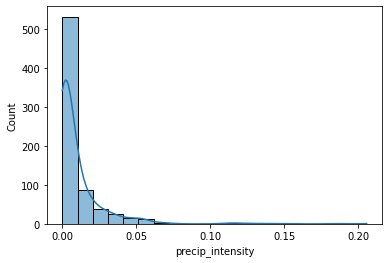

In [17]:
sns.histplot(data = bigfoot, x = 'precip_intensity', bins=20, kde = True);

###  Task 2) 

Now, let's see how two variables might relate to each other when bigfoot is reportedly out. Fill in the function to produce a visualization that shows what combinations of values of `moon_phase` and `wind_speed` are most common when bigfoot is spotted (example shown below). **hint:** Use ``seaborn(sns.kdeplot)``

![](https://drive.google.com/uc?export=view&id=1Th31v4jb9i43YrsfhV-HUpls48XszWjD)

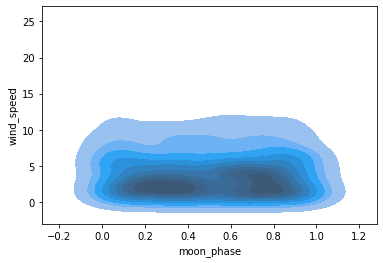

In [18]:
# type(variable1) == String
# type(variable2) == String

def plot(variable1,variable2):
    sns.kdeplot(data = bigfoot, x = variable1, y = variable2, shade = True)
plot("moon_phase", "wind_speed")

### Task 3) 

Now, let's look at some qualitative variables. Write a line of code that produces a visualization that shows the distribution of bigfoot sightings across the variable `season` (example shown below). **hint:** Use `seaborn(sns.countplot)/matplotlib(plt.bar)`.

![](https://drive.google.com/uc?export=view&id=1epvnkLB4Ncqg719_g8guYb5UUC7_Qd2i)

*Solution: a `countplot` or a `barplot` for the `season` variable is probably the best bet here since we're just looking for counts of observations across categories across categorical variables.*

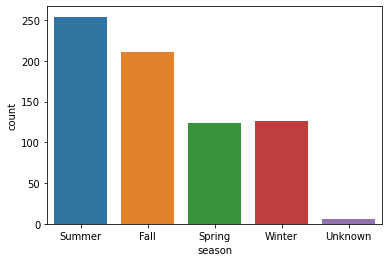

In [19]:
sns.countplot(data = bigfoot, x = 'season');

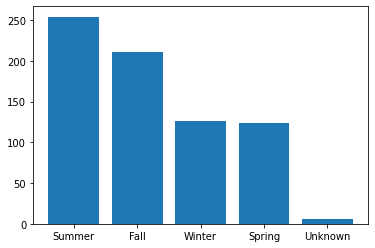

In [20]:
plt.bar(bigfoot['season'].value_counts().index, bigfoot['season'].value_counts());

### Task 4) 

Produce a single visualization that showcases how the prevalence of bigfoot sightings at particular combinations of `moon_phase` and `wind_speed` vary across each season. **hint:** Think about color as the third information channel on the plot.

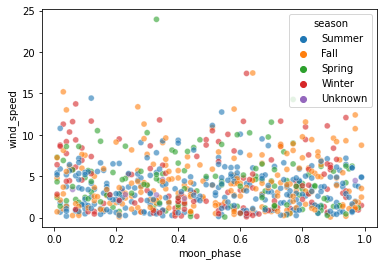

In [21]:
sns.scatterplot(data = bigfoot, 
                x = 'moon_phase', 
                y = 'wind_speed', 
                hue = 'season', 
                alpha = 0.6);

For this question, there are too many points plotted with too much granular information for a scatterplot to really be read. It's probably a better idea to do a contour plot/KDE for each group.

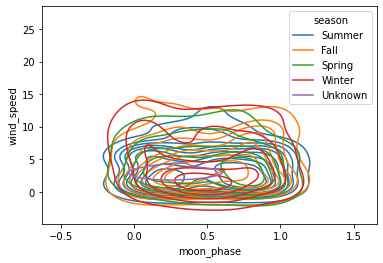

In [22]:
sns.kdeplot(data = bigfoot, 
                x = 'moon_phase', 
                y = 'wind_speed', 
                hue = 'season', alpha = 1);

# KDE


### Task 1)

Kernel Density Estimation is used to estimate a probability density function (or density curve) from a set of data. A kernel with a bandwidth parameter $\alpha$ is placed on data observations $x_i$ with $i\in\{1, ...,n\}$, and the density estimation is calculated by averaging all kernels. Below, Gaussian and Boxcar kernel equations are listed:

-  Gaussian Kernel: $K_\alpha(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - x_i)^2}{2 \alpha ^2} \right) $
-  Boxcar Kernel: $B_\alpha(x, x_i)$ =    
  
    - $\frac{1}{\alpha}$ if $(-\frac{\alpha}{2} \leq x - x_i \leq \frac{\alpha}{2})$
    - 0  else

    
  

We wish to compare the results of KDE using a Gaussian kernel and a boxcar kernel. For
α > 0, which of the following statements is true? Choose all that apply.


A. Decreasing α for a Gaussian kernel decreases the smoothness of the KDE.

B. The Gaussian kernel is always better than the boxcar kernel for KDEs.

C. Because the Gaussian kernel is smooth, we can safely use large α values for kernel density estimation without worrying about the actual distribution of data.

D. The area under the boxcar kernel is 1, regardless of the value of α.

E. None of the above.

*answer*: **A,D**


# Logarithmic Transformation


One of your friends at a biology lab asks you to help them analyze `panTHERIA`, a database of mammals. They are interested in the relationship between mass, measured in grams, and metabolic rate (`energy expenditure`), measured by oxygen use per hour. Originally, they showed you the data on a linear (absolute) scale, shown on the left. You notice that the values on both axes vary over a large range with many data points clustered around the smaller values, so you suggest that they instead plot the data on a log-log scale, shown on the right. The solid red line is a "line of best fit" (we'll formalize this later in the course) while the black dashed line represents the identity line $y = x$. 

<img src = "logloganimals.png"></img>

Let C and k be some constant values and x and y represent mass and metabolic rate, respectively. Based on the plots, which of the following best describes the pattern seen in the data? 

Reminder: $log(a \times b) = log(a) + log(b)$

A. $y = C + kx$
 
B. $y = C \times 10^{kx}$

C. $y = C + k\log_{10}(x)$
    
D. $y = Cx^k$


*answer*: **D** 

What parts of the plots could you use to make initial guesses on C and k?

*answer*: 

- **C: $10^b$, where $b$ is the y-intercept of the solid red line in the log-log plot.**
- **k: the slope of the solid red line log-log plot.**

Your friend points to the solid line on the log-log plot and says "since this line is going
up and to the right, we can say that, in general, the bigger a mammal is, the greater its
metabolic rate". Is this a reasonable interpretation of the plot?

*answer*:

**Yes, the observation is equivalent to saying that the slope is positive, which means increases in $x$ correspond to increases in $y$.**

Suppose that instead of plotting positive quantities, our data contained some zero and
negative values. How can we reasonably apply a logarithmic transform to this data?

*answer*:

**We can add the magnitude (or absolute value) of the most negative number in our data, then add a small positive number (e.g., 1). As a concrete example, suppose we had the dataset: ${-3, -2, 4}$. The most negative number is -3, so we add $|-3| = 3$ to all numbers to obtain: ${0, 1, 7}$. By adding a small positive number such as 1, we are able to take the $log$ of the numbers: ${1, 2, 8}$. Why is this last step necessary?**